<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Pandas-Dataframe" data-toc-modified-id="Pandas-Dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas Dataframe</a></span></li><li><span><a href="#Viewing-Images" data-toc-modified-id="Viewing-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Viewing Images</a></span></li><li><span><a href="#Keras-Standardization-and-Train/test-Split" data-toc-modified-id="Keras-Standardization-and-Train/test-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keras Standardization and Train/test Split</a></span></li><li><span><a href="#Keras-Normalizing-Images" data-toc-modified-id="Keras-Normalizing-Images-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Keras Normalizing Images</a></span></li><li><span><a href="#Keras-Grayscale" data-toc-modified-id="Keras-Grayscale-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras Grayscale</a></span></li><li><span><a href="#Thresholding-and-Binary-Images" data-toc-modified-id="Thresholding-and-Binary-Images-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Thresholding and Binary Images</a></span></li><li><span><a href="#Sobel-Edges" data-toc-modified-id="Sobel-Edges-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sobel Edges</a></span></li><li><span><a href="#Canny-Edges" data-toc-modified-id="Canny-Edges-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Canny Edges</a></span></li><li><span><a href="#Harris-Corners" data-toc-modified-id="Harris-Corners-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Harris Corners</a></span></li><li><span><a href="#Superpixel-Segmentation" data-toc-modified-id="Superpixel-Segmentation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Superpixel Segmentation</a></span></li><li><span><a href="#Color-Picking" data-toc-modified-id="Color-Picking-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Color Picking</a></span><ul class="toc-item"><li><span><a href="#Tan-to-Brown" data-toc-modified-id="Tan-to-Brown-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Tan to Brown</a></span></li><li><span><a href="#Green" data-toc-modified-id="Green-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Green</a></span></li></ul></li><li><span><a href="#Final-Dataframe-Modification" data-toc-modified-id="Final-Dataframe-Modification-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Final Dataframe Modification</a></span><ul class="toc-item"><li><span><a href="#Image-Path-Dataframe" data-toc-modified-id="Image-Path-Dataframe-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Image Path Dataframe</a></span></li></ul></li><li><span><a href="#Resizing-and-Saving-Images" data-toc-modified-id="Resizing-and-Saving-Images-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Resizing and Saving Images</a></span></li><li><span><a href="#Stacking-Images" data-toc-modified-id="Stacking-Images-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Stacking Images</a></span></li></ul></div>

In [1]:
from tensorflow import keras
import pathlib
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from PIL import Image
import PIL
from numpy import asarray
import cv2

# Loading Data

In [2]:
dataset_url = "data"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='corn_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
#Loading data into keras, https://www.tensorflow.org/tutorials/load_data/images
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_url, 
                                                              image_size=(180, 180), 
                                                              batch_size=64, 
                                                              labels='inferred',  
                                                              label_mode='categorical')

Found 4188 files belonging to 4 classes.


In [4]:
#Listing directories in folder
os.listdir(dataset_url)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [5]:
#counting number of images in each directory
Blight = glob(os.path.join(dataset_url+"/Blight/"+"*"))
Common_Rust = glob(os.path.join(dataset_url+"/Common_Rust/"+"*"))
Gray_Leaf_Spot = glob(os.path.join(dataset_url+"/Gray_Leaf_Spot/"+"*"))
healthy = glob(os.path.join(dataset_url+"/Healthy/"+"*"))
print('Blight images:', len(Blight))
print('Rust images:', len(Common_Rust))
print('Spot images:', len(Gray_Leaf_Spot))
print('Healthy images:', len(healthy))
print('Total images:', len(Blight)+len(Common_Rust)+len(Gray_Leaf_Spot)+len(healthy))

Blight images: 1146
Rust images: 1306
Spot images: 574
Healthy images: 1162
Total images: 4188


In [6]:
#Creating labels for images
import pandas as pd
labels = pd.DataFrame(['Blight'] * len(Blight) + ['Common_Rust'] * len(Common_Rust) + ['Gray_Leaf_Spot'] * len(Gray_Leaf_Spot) + ['Healthy'] * len(healthy))
print(labels.value_counts())
print('total labels:', len(labels))

Common_Rust       1306
Healthy           1162
Blight            1146
Gray_Leaf_Spot     574
dtype: int64
total labels: 4188


# Pandas Dataframe

In [7]:
#creating dataframe of images, making column for file names.
df = pd.DataFrame()
df['file'] = os.listdir('data/Blight') + os.listdir('data/Common_Rust') + os.listdir('data/Gray_Leaf_Spot') + os.listdir('data/Healthy')
df.sample(5)

,file
3144,Corn_Health (1104).jpg
3335,Corn_Health (230).jpg
1139,Corn_Blight (993).JPG
603,Corn_Blight (51).jpg
2029,Corn_Common_Rust (618).JPG


In [8]:
#Creating column for image path
addresses = []
for path, subdirs, files in os.walk('data'):
    for name in files:
        addresses.append(os.path.join(path, name))
df['path'] = addresses

In [9]:
df.sample(5)

,file,path
3503,Corn_Health (382).jpg,data\Healthy\Corn_Health (382).jpg
3415,Corn_Health (302).jpg,data\Healthy\Corn_Health (302).jpg
885,Corn_Blight (764).JPG,data\Blight\Corn_Blight (764).JPG
542,Corn_Blight (455).JPG,data\Blight\Corn_Blight (455).JPG
709,Corn_Blight (605).JPG,data\Blight\Corn_Blight (605).JPG


In [10]:
#creating label column for dataframe
df['Label'] = ""
df.loc[df['path'].str.contains('Blight'), 'Label'] = 'Blight'
df.loc[df['path'].str.contains('Common_Rust'), 'Label'] = 'Common_Rust'
df.loc[df['path'].str.contains('Gray_Spot'), 'Label'] = 'Gray_Spot'
df.loc[df['path'].str.contains('Healthy'), 'Label'] = 'Healthy'

In [11]:
df.sample(7)

,file,path,Label
1163,Corn_Common_Rust (1013).JPG,data\Common_Rust\Corn_Common_Rust (1013).JPG,Common_Rust
3164,Corn_Health (1122).jpg,data\Healthy\Corn_Health (1122).jpg,Healthy
2208,Corn_Common_Rust (78).JPG,data\Common_Rust\Corn_Common_Rust (78).JPG,Common_Rust
2709,Corn_Gray_Spot (330).JPG,data\Gray_Leaf_Spot\Corn_Gray_Spot (330).JPG,Gray_Spot
2012,Corn_Common_Rust (602).JPG,data\Common_Rust\Corn_Common_Rust (602).JPG,Common_Rust
3059,Corn_Health (1028).JPG,data\Healthy\Corn_Health (1028).JPG,Healthy
3794,Corn_Health (644).jpg,data\Healthy\Corn_Health (644).jpg,Healthy


In [12]:
#placing photos in column in dataframe
#from numpy import asarray #use if need to convert photos into array

photos = []
for i in df.path:
    photos.append(Image.open(i))

df['photos'] = photos

In [13]:
rgb_array = []

for i in df.photos:
    rgb_array.append(asarray(i))

In [14]:
df['rgb_array'] = rgb_array

In [15]:
df.head()

,file,path,Label,photos,rgb_array
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,..."
1,Corn_Blight (1).jpg,data\Blight\Corn_Blight (1).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[81, 86, 30], [75, 80, 26], [75, 82, 30], [7..."
2,Corn_Blight (10).jpg,data\Blight\Corn_Blight (10).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[246, 252, 240], [248, 255, 243], [151, 163,..."
3,Corn_Blight (100).jpg,data\Blight\Corn_Blight (100).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[30, 22, 9], [30, 22, 9], [27, 21, 9], [23, ..."
4,Corn_Blight (1000).JPG,data\Blight\Corn_Blight (1000).JPG,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[178, 170, 183], [168, 160, 173], [174, 166,..."


# Viewing Images

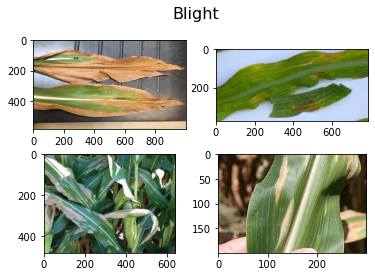

In [16]:
#Viewing raw blight corn leaf images
plt.suptitle('Blight', fontsize=16)
for i in list(range(4)):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(Blight[i]))

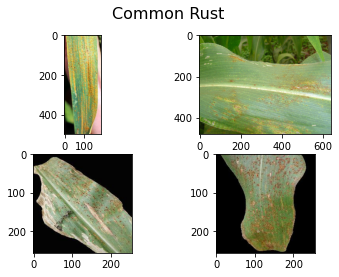

In [20]:
#viewing raw common rust corn leaf images
plt.suptitle('Common Rust', fontsize=16)
for i in list(range(4)):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(Common_Rust[i]))

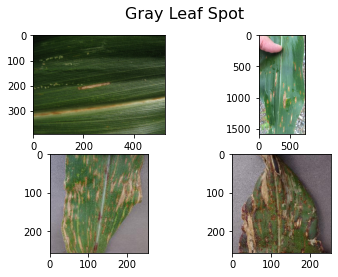

In [21]:
#viewing raw gray leaf spot leaf images
plt.suptitle('Gray Leaf Spot', fontsize=16)
for i in list(range(4)):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(Gray_Leaf_Spot[i]))

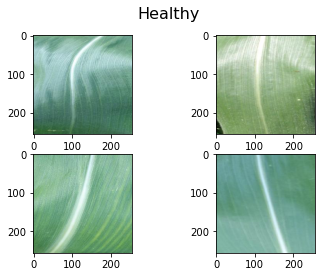

In [22]:
#viewing raw healthy corn leaf images
plt.suptitle('Healthy', fontsize=16)
for i in list(range(4)):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(healthy[i]))

# Keras Standardization and Train/test Split

Used the following website for the following code:  https://www.tensorflow.org/tutorials/load_data/images

In [23]:
#Setting image parameters for Keras
batch_size = 32
img_height = 180
img_width = 180

In [24]:
#creating set of raw standardized shaped images
all_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.


In [25]:
#creating training set of raw images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [26]:
#creating validation set of raw images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [27]:
#viewing class names for training and validation data, viewing both to ensure they are the same
class_names = train_ds.class_names
print('Training class names:', class_names)
print('Validation class names:', val_ds.class_names)

Training class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Validation class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


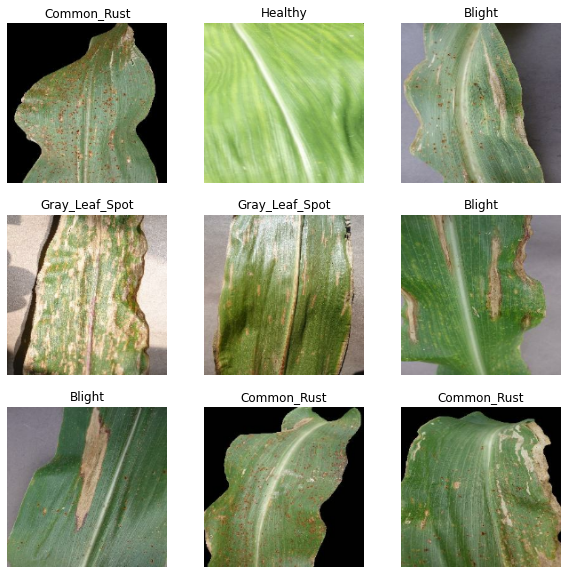

In [28]:
#viewing training images after they have been processed to have 180x180 dimensions
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

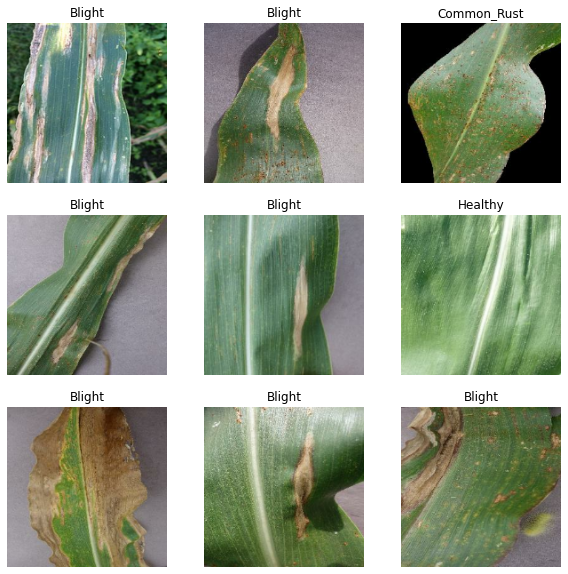

In [29]:
#viewing validation images after they have been processed to have 180x180 dimensions
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Keras Normalizing Images

In [30]:
#Standardizing color scale for training and validations images
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [31]:
#Normalizing all images color
all_normalized_ds = all_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(all_normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.06878576 1.0


In [32]:
#Normalizing training images color
train_normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(train_normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.8715623


In [33]:
#Normalizing validation images color
val_normalized_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(val_normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9780301


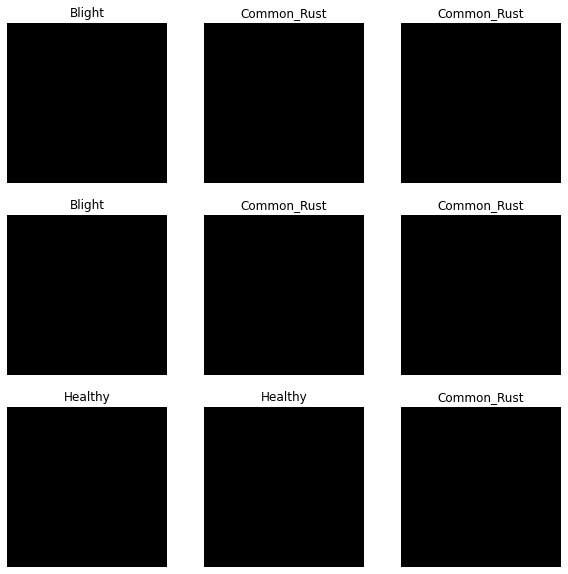

In [34]:
#viewing training images after they have been processed to have been normalized for color
plt.figure(figsize=(10, 10))
for images, labels in all_normalized_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Keras Grayscale

In [35]:
#creating set of raw standardized shaped images
gs_all_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.


In [36]:
#creating training set of raw images
gs_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [37]:
#creating validation set of raw images
gs_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, 
  color_mode = 'grayscale')

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


# Thresholding and Binary Images

Much of the following sections of image processing are taken from this Datacamp course: https://www.datacamp.com/courses/image-processing-with-keras-in-python/continue

In [16]:
from skimage.filters import threshold_otsu
from skimage import color, data
from skimage import io

In [17]:
#create list of images converted to grayscale
gs = []
for i in df.path:
    gs.append(np.asarray(Image.open(i).convert('L')))   

In [18]:
#put list into dataframe
df['grayscale'] = gs

In [19]:
df.head()

,file,path,Label,photos,rgb_array,grayscale
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[139, 134, 134, 139, 145, 147, 149, 149, 149,..."
1,Corn_Blight (1).jpg,data\Blight\Corn_Blight (1).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[81, 86, 30], [75, 80, 26], [75, 82, 30], [7...","[[78, 72, 74, 77, 73, 74, 77, 76, 72, 71, 72, ..."
2,Corn_Blight (10).jpg,data\Blight\Corn_Blight (10).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[246, 252, 240], [248, 255, 243], [151, 163,...","[[249, 252, 158, 87, 98, 100, 101, 123, 136, 1..."
3,Corn_Blight (100).jpg,data\Blight\Corn_Blight (100).jpg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[30, 22, 9], [30, 22, 9], [27, 21, 9], [23, ...","[[23, 23, 21, 19, 18, 17, 20, 24, 27, 32, 38, ..."
4,Corn_Blight (1000).JPG,data\Blight\Corn_Blight (1000).JPG,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[178, 170, 183], [168, 160, 173], [174, 166,...","[[174, 164, 170, 177, 170, 168, 176, 181, 164,..."


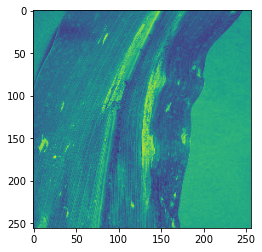

(256, 256)


In [20]:
#view one of the images converted to grayscale
plt.imshow(df.grayscale[199])
plt.show()
print(df.grayscale[199].shape)

In [21]:
#determine optimal black and white threshold for each image
otsu = []

for i in df.path:
    otsu.append(threshold_otsu(color.rgb2gray(io.imread(i))))

In [22]:
#input optimal threshold into dataframe
df['thresh_otsu'] = otsu

In [23]:
#compair mean of each group of optimal threshold
print('Blight mean threshold:', np.mean(df[df['Label']=='Blight'].thresh_otsu))
print('Common_Rust mean threshold:', np.mean(df[df['Label']=='Common_Rust'].thresh_otsu))
print('Gray_Spot mean threshold:', np.mean(df[df['Label']=='Gray_Spot'].thresh_otsu))
print('Healthy mean threshold:', np.mean(df[df['Label']=='Healthy'].thresh_otsu))
print('Overall mean threshold:', np.mean(df.thresh_otsu))

Blight mean threshold: 0.4750613153334109
Common_Rust mean threshold: 0.29420097930073374
Gray_Spot mean threshold: 0.4777453620280043
Healthy mean threshold: 0.6101555523386885
Overall mean threshold: 0.4565122578702193


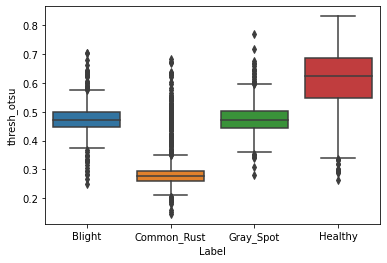

In [46]:
#Boxplot to compair threshold otsu for each category
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df.Label, df.thresh_otsu)
plt.show()

In [47]:
#Carry out ANOVA to compare thresh_otsu between each group.  Most all categories are not normally distributed
#based on boxplot above so this test is not entirely correct.
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df[df['Label']=='Blight'].thresh_otsu, 
                                df[df['Label']=='Common_Rust'].thresh_otsu, 
                                df[df['Label']=='Gray_Spot'].thresh_otsu, 
                                df[df['Label']=='Healthy'].thresh_otsu, 
                                df.thresh_otsu)
print(fvalue, pvalue)

1188.195731926168 0.0


In [48]:
#Carry out KW test due to likely non-normal distribution to compare groups.
from scipy import stats

stats.kruskal(df[df['Label']=='Blight'].thresh_otsu, 
                                df[df['Label']=='Common_Rust'].thresh_otsu, 
                                df[df['Label']=='Gray_Spot'].thresh_otsu, 
                                df[df['Label']=='Healthy'].thresh_otsu, 
                                df.thresh_otsu)

KruskalResult(statistic=2881.831413882545, pvalue=0.0)

In [49]:
#Parametric comparison of groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df.thresh_otsu, groups=df.Label)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
     Blight Common_Rust  -0.1809  0.001 -0.1887 -0.173   True
     Blight   Gray_Spot   0.0027 0.8944 -0.0072 0.0126  False
     Blight     Healthy   0.1351  0.001   0.127 0.1432   True
Common_Rust   Gray_Spot   0.1835  0.001  0.1738 0.1932   True
Common_Rust     Healthy    0.316  0.001  0.3081 0.3238   True
  Gray_Spot     Healthy   0.1324  0.001  0.1225 0.1423   True
-------------------------------------------------------------


In [50]:
#nonparametric comparison of groups
import scikit_posthocs as sp

b = df[df['Label']=='Blight'].thresh_otsu 
c = df[df['Label']=='Common_Rust'].thresh_otsu 
g = df[df['Label']=='Gray_Spot'].thresh_otsu 
h = df[df['Label']=='Healthy'].thresh_otsu
groups = [b, c, g, h]

sp.posthoc_dunn(groups, p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000e+00,1.041828e-203,1.000000e+00,5.236121e-105
2,1.041828e-203,1.000000e+00,1.713878e-136,0.000000e+00
3,1.000000e+00,1.713878e-136,1.000000e+00,3.267200e-68
4,5.236121e-105,0.000000e+00,3.267200e-68,1.000000e+00


In [24]:
df.head(1)

,file,path,Label,photos,rgb_array,grayscale,thresh_otsu
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[139, 134, 134, 139, 145, 147, 149, 149, 149,...",0.529297


In [25]:
import cv2

binary = []

for i, j in zip(df.thresh_otsu, df.path):
    img_grey = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
    img_binary = cv2.threshold(img_grey, i*255, 255, cv2.THRESH_BINARY)[1]
    binary.append(img_binary)

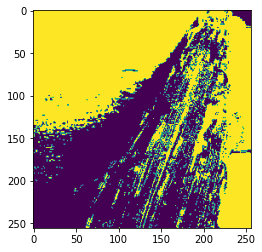

In [26]:
plt.imshow(binary[5])
plt.show()

In [27]:
df['binary'] = binary

In [28]:
df.head(1)

,file,path,Label,photos,rgb_array,grayscale,thresh_otsu,binary
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[139, 134, 134, 139, 145, 147, 149, 149, 149,...",0.529297,"[[255, 0, 0, 255, 255, 255, 255, 255, 255, 255..."


# Sobel Edges

In [29]:
from skimage.filters import sobel
from skimage import color

In [30]:
sobel_ims = []

for i in df.grayscale:
    sobel_ims.append(sobel(i)*255)

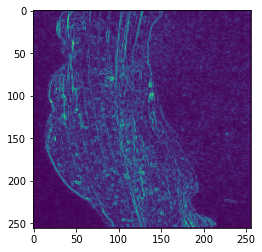

In [31]:
plt.imshow(sobel_ims[400])
plt.show()

In [32]:
df['sobel_edges'] = sobel_ims

In [33]:
df.head(1)

,file,path,Label,photos,rgb_array,grayscale,thresh_otsu,binary,sobel_edges
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[139, 134, 134, 139, 145, 147, 149, 149, 149,...",0.529297,"[[255, 0, 0, 255, 255, 255, 255, 255, 255, 255...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Canny Edges

In [34]:
from skimage.feature import canny

In [42]:
canny_ims = []

for i in df.grayscale:
    canny_ims.append(canny(i)*255)

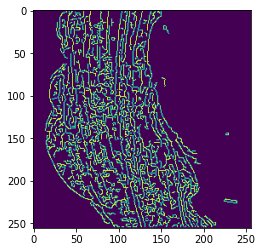

In [43]:
plt.imshow(canny_ims[400])
plt.show()

In [44]:
df['canny_edges'] = canny_ims

In [45]:
df.head(1)

,file,path,Label,photos,rgb_array,grayscale,thresh_otsu,binary,sobel_edges,canny_edges
0,Corn_Blight (1).jpeg,data\Blight\Corn_Blight (1).jpeg,Blight,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[139, 134, 134, 139, 145, 147, 149, 149, 149,...",0.529297,"[[255, 0, 0, 255, 255, 255, 255, 255, 255, 255...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Harris Corners

In [66]:
from skimage.feature import corner_harris, corner_peaks

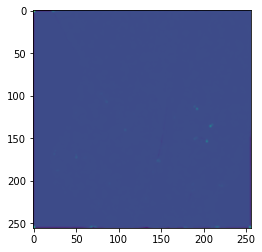

In [67]:
#View results of harris corner analysis of image
measure_image = corner_harris(df.grayscale[55])
coords = corner_peaks(measure_image, min_distance=2)
plt.imshow(measure_image)
plt.show()

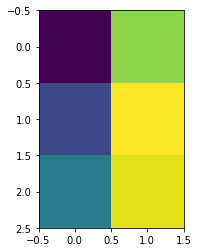

In [68]:
plt.imshow(coords)
plt.show()

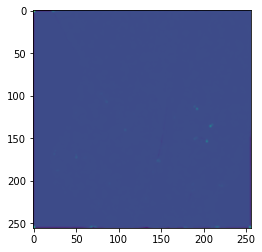

In [69]:
measure_image2 = corner_harris(df.grayscale[55])
coords2 = corner_peaks(measure_image, min_distance=1)
plt.imshow(measure_image2)
plt.show()

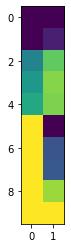

In [70]:
plt.imshow(coords2)
plt.show()

# Superpixel Segmentation

In [71]:
#reduce number of pixels for analysis to reduce noise
from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(df.rgb_array[2950], n_segments= 800)
segmented_image = label2rgb(segments, df.rgb_array[2950], kind='avg')

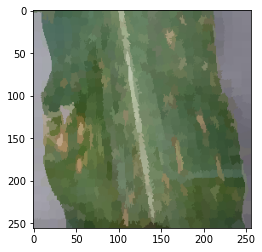

In [72]:
plt.imshow(segmented_image)
plt.show()

# Color Picking

Used the following website to pick colors and obtain RGB values for both the tan to brown and green masks: https://imagecolorpicker.com/

Main source used for developing a color mask: https://realpython.com/python-opencv-color-spaces/

## Tan to Brown

In [50]:
#Values of tan to brown colors picked from images
r = [186, 228, 207, 184, 198, 215, 160, 128, 124, 160, 178, 146, 153, 142, 190, 161, 149, 173, 253, 213, 194, 177, 216, 205, 181, 241, 212, 123]
g = [156, 210, 192, 165, 175, 181, 126, 79, 149, 141, 135, 81, 132, 137, 133, 138, 136, 139, 154, 141, 213, 177, 152, 156, 186, 167, 152, 213, 193, 106]
b = [137, 204, 186, 163, 200, 190, 111, 46, 123, 111, 97, 61, 80, 76, 63, 93, 103, 103, 33, 126, 204, 156, 143, 124, 169, 132, 115, 178, 160, 64]

In [51]:
#Descriptive stats of red
print('r mean:', np.mean(r))
print('r median:', np.median(r))
print('r standard dev:', np.std(r))
print('max r:', max(r))
print('min r:', min(r))

r mean: 182.03571428571428
r median: 182.5
r standard dev: 34.06976261275966
max r: 253
min r: 123


In [52]:
#Descriptive stats on green
print('g mean:', np.mean(g))
print('g median:', np.median(g))
print('g standard dev:', np.std(g))
print('max g:', max(g))
print('min g:', min(g))

g mean: 153.83333333333334
g median: 152.0
g standard dev: 33.1039608237779
max g: 213
min g: 79


In [53]:
#Descriptive stats on blue
print('b mean:', np.mean(b))
print('b median:', np.median(b))
print('b standard dev:', np.std(b))
print('max b:', max(b))
print('min b:', min(b))

b mean: 125.03333333333333
b median: 123.5
b standard dev: 47.96212626182825
max b: 204
min b: 33


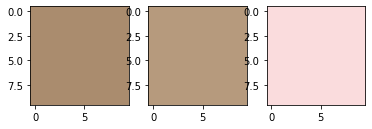

In [54]:
#View lower, mid and high colors to be used for mask
rgb_lower = (170, 140, 110)
rgb_mid = (182, 154, 125)
rgb_upper = (250, 220, 221)

lo_square = np.full((10, 10, 3), rgb_lower, dtype=np.uint8) / 255.0
mid_square = np.full((10, 10, 3), rgb_mid, dtype=np.uint8) / 255.0
hi_square = np.full((10, 10, 3), rgb_upper, dtype=np.uint8) / 255.0

plt.subplot(1, 3, 1)
plt.imshow(lo_square)
plt.subplot(1, 3, 2)
plt.imshow(mid_square)
plt.subplot(1, 3, 3)
plt.imshow(hi_square)
plt.show()

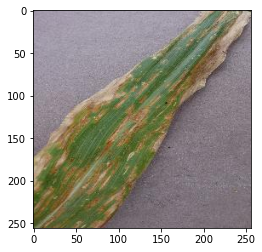

In [55]:
#Convert image to cv2 format and viewing original image
img = cv2.cvtColor(cv2.imread(df['path'][200]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

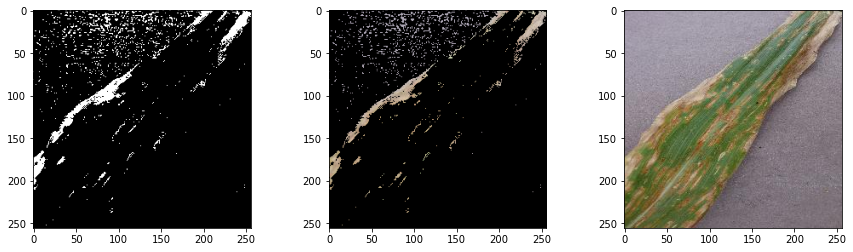

In [56]:
#viewing brown mask
mask = cv2.inRange(img, rgb_lower, rgb_upper)
result = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.show()

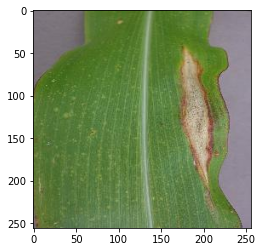

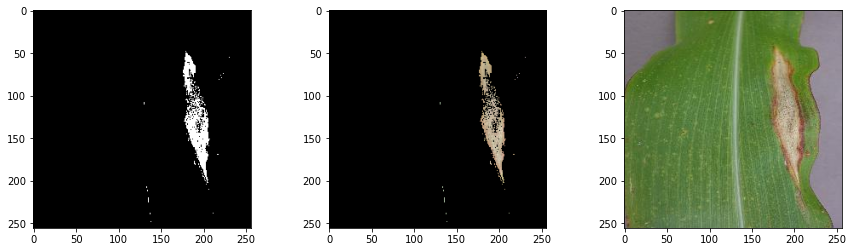

In [57]:
#Viewing brown mask on different corn image.
img = cv2.cvtColor(cv2.imread(df['path'][100]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

mask = cv2.inRange(img, rgb_lower, rgb_upper)
result = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.show()

In [58]:
cv2imgs = []
for i in df.path:
    cv2imgs.append(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB))

In [59]:
df['cv2imgs'] = cv2imgs

In [60]:
rgb_lower = (170, 140, 110)
rgb_upper = (250, 220, 221)

brown_mask = []

for i in df.cv2imgs:
    mask = cv2.inRange(i, rgb_lower, rgb_upper)
    brown_mask.append(cv2.bitwise_and(i, i, mask=mask))

In [61]:
df['brown_mask'] = brown_mask

## Green

In [62]:
#RGB values for green found in corn images.
gr = (45, 128, 172, 100, 223, 94, 162, 109, 117, 139, 62, 117, 52, 106, 101, 228, 114, 92, 88, 134, 86, 223, 73, 85, 68, 79, 93, 82, 94, 120)
gg = (159, 173, 239, 147, 124, 142, 193, 125, 143, 160, 103, 165, 102, 119, 113, 241, 142, 115, 104, 148, 111, 234, 99, 154, 140, 127, 129, 129, 151, 150)
gb = (104, 91, 205, 25, 65, 146, 112, 73, 105, 81, 126, 46, 133, 39, 87, 73, 219, 94, 106, 73, 119, 78, 217, 64, 94, 65, 89, 115, 49, 106, 124)

In [63]:
#red descriptive stats
print('gr mean:', np.mean(gr))
print('gr median:', np.median(gr))
print('gr standard dev:', np.std(gr))
print('max gr:', max(gr))
print('min gr:', min(gr))

gr mean: 112.86666666666666
gr median: 100.5
gr standard dev: 46.72524894410825
max gr: 228
min gr: 45


In [64]:
#Green descriptive stats
print('gg mean:', np.mean(gg))
print('gg median:', np.median(gg))
print('gg standard dev:', np.std(gg))
print('max gg:', max(gg))
print('min gg:', min(gg))

gg mean: 146.03333333333333
gg median: 142.0
gg standard dev: 37.81312235484162
max gg: 241
min gg: 99


In [65]:
#Blue descriptive stats
print('gb mean:', np.mean(gb))
print('gb median:', np.median(gb))
print('gb standard dev:', np.std(gb))
print('max gb:', max(gb))
print('min gb:', min(gb))

gb mean: 100.74193548387096
gb median: 94.0
gb standard dev: 46.2259302611853
max gb: 219
min gb: 25


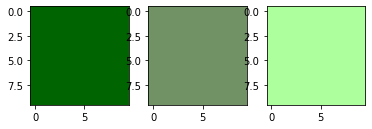

In [66]:
#View lower, mid and high colors to be used for green mask
g_lower = (0, 100, 0)
g_mid = (112, 146, 100)
g_upper = (173, 255, 157)

lo_square = np.full((10, 10, 3), g_lower, dtype=np.uint8) / 255.0
mid_square = np.full((10, 10, 3), g_mid, dtype=np.uint8) / 255.0
hi_square = np.full((10, 10, 3), g_upper, dtype=np.uint8) / 255.0

plt.subplot(1, 3, 1)
plt.imshow(lo_square)
plt.subplot(1, 3, 2)
plt.imshow(mid_square)
plt.subplot(1, 3, 3)
plt.imshow(hi_square)
plt.show()

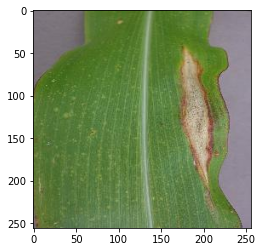

In [67]:
#converting image to cv2 format and viewing original
img = cv2.cvtColor(cv2.imread(df['path'][100]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

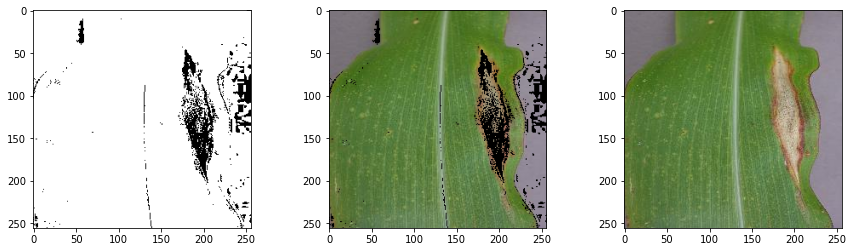

In [68]:
#Viewing green mask 
mask = cv2.inRange(img, g_lower, g_upper)
result = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.show()

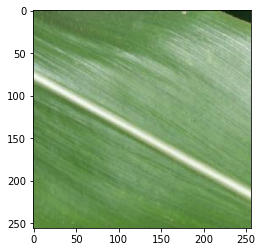

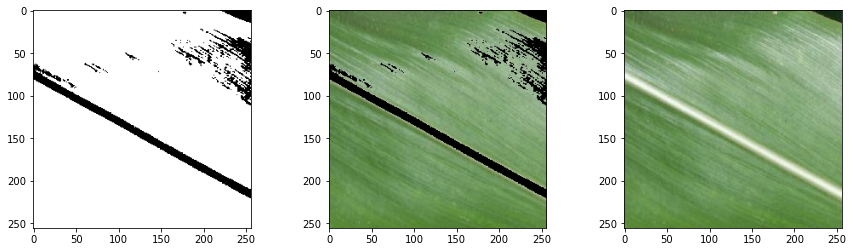

In [69]:
#viewing green mask on another image
img = cv2.cvtColor(cv2.imread(df['path'][4000]), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

mask = cv2.inRange(img, g_lower, g_upper)
result = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.show()

In [70]:
#Applying green mask to all images
g_lower = (0, 100, 0)
g_upper = (173, 255, 157)

green_mask = []

for i in df.cv2imgs:
    mask = cv2.inRange(i, g_lower, g_upper)
    green_mask.append(cv2.bitwise_and(i, i, mask=mask))

In [71]:
#Adding green mask images to dataframe
df['green_mask'] = green_mask

# Final Dataframe Modification

In [72]:
#drop columns that will not be used or are redundant
df = df.drop(columns = ['photos', 'thresh_otsu', 'file', 'rgb_array'])

In [73]:
df.head(1)

,path,Label,grayscale,binary,sobel_edges,canny_edges,cv2imgs,brown_mask,green_mask
0,data\Blight\Corn_Blight (1).jpeg,Blight,"[[139, 134, 134, 139, 145, 147, 149, 149, 149,...","[[255, 0, 0, 255, 255, 255, 255, 255, 255, 255...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[131, 140, 157], [126, 135, 152], [126, 135,..."


In [74]:
df.Label.value_counts()

Common_Rust    1306
Healthy        1162
Blight         1146
Gray_Spot       574
Name: Label, dtype: int64

In [75]:
#Saving grayscale images
for i, j, k in zip(df.grayscale, df.Label, range(4188)):
    im = Image.fromarray(i)
    im.save("./grayscale/" + j + "/" + str(k) + ".jpeg")

In [76]:
#Saving binary images
for i, j, k in zip(df.binary, df.Label, range(4188)):
    im = Image.fromarray(i)
    im.save("./binary/" + j + "/" + str(k) + ".jpeg")

In [77]:
#Saving sobel_edges images
for i, j, k in zip(df.sobel_edges, df.Label, range(4188)):
    im = Image.fromarray(i).convert("L")
    im.save("./sobel_edges/" + j + "/" + str(k) + ".jpeg")

In [100]:
#Saving canny_edges images
for i, j, k in zip(df.canny_edges, df.Label, range(4188)):
    im = Image.fromarray(i)
    im = im.convert('RGB')
    im.save("./canny_edges/" + j + "/" + str(k) + ".jpeg")

In [79]:
#Saving brown_mask images
for i, j, k in zip(df.brown_mask, df.Label, range(4188)):
    im = Image.fromarray(i)
    im.save("./brown_mask/" + j + "/" + str(k) + ".jpeg")

In [80]:
#Saving green_mask images
for i, j, k in zip(df.green_mask, df.Label, range(4188)):
    im = Image.fromarray(i)
    im.save("./green_mask/" + j + "/" + str(k) + ".jpeg")

## Image Path Dataframe

In [81]:
df_paths = pd.DataFrame()

In [82]:
#Creating column for rgb image path
original = []
for path, subdirs, files in os.walk('RGB'):
    for name in files:
        original.append(os.path.join(path, name))
df_paths['rgb'] = original

In [83]:
#Creating column for binary image path
binary = []
for path, subdirs, files in os.walk('binary'):
    for name in files:
        binary.append(os.path.join(path, name))
df_paths['binary'] = binary

In [84]:
#Creating column for brown mask image path
brown_mask = []
for path, subdirs, files in os.walk('brown_mask'):
    for name in files:
        brown_mask.append(os.path.join(path, name))
df_paths['brown_mask'] = brown_mask

In [85]:
#Creating column for green mask image path
green_mask = []
for path, subdirs, files in os.walk('green_mask'):
    for name in files:
        green_mask.append(os.path.join(path, name))
df_paths['green_mask'] = green_mask

In [86]:
#Creating column for grayscale image path
grayscale = []
for path, subdirs, files in os.walk('grayscale'):
    for name in files:
        grayscale.append(os.path.join(path, name))
df_paths['grayscale'] = grayscale

In [87]:
#Creating column for canny edges image path
canny_edges = []
for path, subdirs, files in os.walk('canny_edges'):
    for name in files:
        canny_edges.append(os.path.join(path, name))
df_paths['canny_edges'] = canny_edges

In [88]:
#Creating column for sobel edges image path
sobel_edges = []
for path, subdirs, files in os.walk('sobel_edges'):
    for name in files:
        sobel_edges.append(os.path.join(path, name))
df_paths['sobel_edges'] = sobel_edges

In [89]:
#creating label column for dataframe
df_paths['Label'] = ""
df_paths.loc[df_paths['rgb'].str.contains('Blight'), 'Label'] = 'Blight'
df_paths.loc[df_paths['rgb'].str.contains('Common_Rust'), 'Label'] = 'Common_Rust'
df_paths.loc[df_paths['rgb'].str.contains('Gray_Spot'), 'Label'] = 'Gray_Spot'
df_paths.loc[df_paths['rgb'].str.contains('Healthy'), 'Label'] = 'Healthy'

In [90]:
df_paths.head()

,rgb,binary,brown_mask,green_mask,grayscale,canny_edges,sobel_edges,Label
0,RGB\Blight\0.jpeg,binary\Blight\0.jpeg,brown_mask\Blight\0.jpeg,green_mask\Blight\0.jpeg,grayscale\Blight\0.jpeg,canny_edges\Blight\0.jpeg,sobel_edges\Blight\0.jpeg,Blight
1,RGB\Blight\1.jpeg,binary\Blight\1.jpeg,brown_mask\Blight\1.jpeg,green_mask\Blight\1.jpeg,grayscale\Blight\1.jpeg,canny_edges\Blight\1.jpeg,sobel_edges\Blight\1.jpeg,Blight
2,RGB\Blight\10.jpeg,binary\Blight\10.jpeg,brown_mask\Blight\10.jpeg,green_mask\Blight\10.jpeg,grayscale\Blight\10.jpeg,canny_edges\Blight\10.jpeg,sobel_edges\Blight\10.jpeg,Blight
3,RGB\Blight\100.jpeg,binary\Blight\100.jpeg,brown_mask\Blight\100.jpeg,green_mask\Blight\100.jpeg,grayscale\Blight\100.jpeg,canny_edges\Blight\100.jpeg,sobel_edges\Blight\100.jpeg,Blight
4,RGB\Blight\1000.jpeg,binary\Blight\1000.jpeg,brown_mask\Blight\1000.jpeg,green_mask\Blight\1000.jpeg,grayscale\Blight\1000.jpeg,canny_edges\Blight\1000.jpeg,sobel_edges\Blight\1000.jpeg,Blight


In [91]:
df_paths['Label'].value_counts()

Common_Rust    1306
Healthy        1162
Blight         1146
Gray_Spot       574
Name: Label, dtype: int64

In [115]:
#Saving dataframe of image file paths
#df_paths.to_csv('corn_images_paths.csv')

# Resizing and Saving Images

In [92]:
#rescaling and saving RGB images
for i, j, k in zip(df_paths['rgb'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    im = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(im, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./RGB/" + j + "/" + str(k) + ".jpeg", cv2.cvtColor(resized, cv2.COLOR_RGB2BGR))

In [93]:
#rescaling and saving brown mask images
for i, j, k in zip(df_paths['brown_mask'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    im = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(im, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./brown_mask/" + j + "/" + str(k) + ".jpeg", cv2.cvtColor(resized, cv2.COLOR_RGB2BGR))

In [94]:
#rescaling and saving green mask images
for i, j, k in zip(df_paths['green_mask'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    im = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(im, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./green_mask/" + j + "/" + str(k) + ".jpeg", cv2.cvtColor(resized, cv2.COLOR_RGB2BGR))

In [101]:
#rescaling and saving canny edges images
for i, j, k in zip(df_paths['canny_edges'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    im = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(im, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./canny_edges/" + j + "/" + str(k) + ".jpeg", cv2.cvtColor(resized, cv2.COLOR_RGB2BGR))

In [96]:
#rescaling and saving grayscale images
for i, j, k in zip(df_paths['grayscale'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(im, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./grayscale/" + j + "/" + str(k) + ".jpeg", resized)

In [97]:
#rescaling and saving binary images
#Note: all images appear to be all black because numpy array is 0's and 1's.  
for i, j, k in zip(df_paths['binary'], df_paths.Label, range(4188)):
    img = cv2.imread(i)
    resized = cv2.resize(img, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./binary/" + j + "/" + str(k) + ".jpeg", resized)

In [98]:
#rescaling and saving sobel edges images
#Note: all images appear to be all black because numpy array values are between 0 and 1.
for i, j, k in zip(sobel_ims, df_paths.Label, range(4188)):
    resized = cv2.resize(i, (180, 180), interpolation = cv2.INTER_AREA)
    cv2.imwrite("./sobel_edges/" + j + "/" + str(k) + ".jpeg", resized)

# Stacking Images

In [102]:
#Stacking images horizontally
stack_imgs = []

for i in range(0, len(df_paths)):
    stack = np.hstack([cv2.imread(df_paths.grayscale[i]) , cv2.imread(df_paths.binary[i]), cv2.imread(df_paths.rgb[i]), cv2.imread(df_paths.brown_mask[i]), cv2.imread(df_paths.green_mask[i]), cv2.imread(df_paths.canny_edges[i]), cv2.imread(df_paths.sobel_edges[i])])
    im = cv2.cvtColor(stack, cv2.COLOR_RGB2BGR)
    stack_imgs.append(im)

In [103]:
#viewing shape of one of the stacked images
stack_imgs[5].shape

(180, 1260, 3)

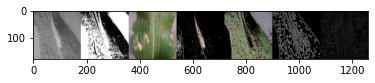

In [106]:
#viewing one of the stacked images
plt.imshow(stack_imgs[550])
plt.show()

In [107]:
#adding column of stacked images to dataframe
df['stacked'] = stack_imgs
df.head(1)

,path,Label,grayscale,binary,sobel_edges,canny_edges,cv2imgs,brown_mask,green_mask,stacked
0,data\Blight\Corn_Blight (1).jpeg,Blight,"[[139, 134, 134, 139, 145, 147, 149, 149, 149,...","[[255, 0, 0, 255, 255, 255, 255, 255, 255, 255...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[131, 140, 157], [126, 135, 152], [126, 135,...","[[[138, 138, 138], [153, 153, 153], [157, 157,..."


In [108]:
#Saving dataframe of arrays
df.to_csv('corn_images.csv')

In [109]:
#Saving stacked images
for i, j, k in zip(df.stacked, df.Label, range(4188)):
    im = Image.fromarray(i)
    im.save("./stacked/" + j + "/" + str(k) + ".jpeg")

In [110]:
#Creating column for stacked images path
stacked_ims = []
for path, subdirs, files in os.walk('stacked'):
    for name in files:
        stacked_ims.append(os.path.join(path, name))
df_paths['stacked'] = stacked_ims

In [111]:
df_paths.head(1)

,rgb,binary,brown_mask,green_mask,grayscale,canny_edges,sobel_edges,Label,stacked
0,RGB\Blight\0.jpeg,binary\Blight\0.jpeg,brown_mask\Blight\0.jpeg,green_mask\Blight\0.jpeg,grayscale\Blight\0.jpeg,canny_edges\Blight\0.jpeg,sobel_edges\Blight\0.jpeg,Blight,stacked\Blight\0.jpeg


In [112]:
#Saving dataframe of image file paths
df_paths.to_csv('corn_images_paths.csv')